#Sentiment Analysis of a Text File

Importing necessary modules.

In [ ]:
# Install NLTK
!pip install nltk
# Download the required NLTK libraries and datasets
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.corpus import stopwords
import nltk
# Use the nltk.sentiment.vader library to perform sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('textstat')
nltk.download('punkt')
nltk.download('words')
import string
from wordcloud import WordCloud

* Updating Essay By removing Stopwords.Apprpach 1.

In [ ]:

# Open the file in read mode
with open('essay.txt', 'r') as file:
    # Read the contents of the file into a string
    text = file.read()

# Split the string into a list of words
words = text.split()

# Get the list of stopwords in English
stop_words = stopwords.words('english')

# Remove the stopwords from the list of words
filtered_words = [word for word in words if word not in stop_words]

# Write the filtered list of words back to the file
with open('essay.txt', 'w') as file:
    file.write(' '.join(filtered_words))


* Creating new file called cleaned_essay.Approach 2.

In [39]:
# import the stopwords class
from nltk.corpus import stopwords

# create a set of stopwords
stop_words = set(stopwords.words('english'))

# split the essay into a list of words
words = text.split()

# remove the stopwords from the list of words
filtered_words = [word for word in words if word not in stop_words]

# join the filtered words back into a string
cleaned_essay = " ".join(filtered_words)

# print the cleaned essay
print(cleaned_essay)


Globalization refers increasing interconnectedness interdependence world's economies, cultures, populations. It process taking place centuries, accelerated dramatically recent decades due advances transportation, communication, technology. There many positive aspects globalization. For example, led increased trade economic growth, well spread ideas, technologies, cultural exchange. It also contributed reduction poverty improvement living standards many developing countries. However, globalization also critics. Some argue contributed income inequality, environmental degradation, loss traditional cultures ways life. Others point negative impacts globalization labor markets, globalization often led outsourcing jobs countries lower labor costs. One main drivers globalization expansion international trade. The reduction trade barriers, tariffs quotas, made easier businesses sell products services foreign markets. This led growth international trade emergence global supply chains, products m

Sentiment Intensity Analyzer

* Approach 1 Using Vader Sentiment Intensity Analyzer

In [4]:
# Initialize the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Create empty lists to hold the positive and negative words
positive_words = []
negative_words = []

# Open a file containing a list of words
with open('/content/essay.txt', 'r') as f:
    # Read each line of the file
    for line in f:
        # Strip the newline character from the end of the line
        word = line.strip()
        
        # Use the SentimentIntensityAnalyzer to get the sentiment of the word
        sentiment = sid.polarity_scores(word)
        
        # If the word is positive, add it to the positive list
        if sentiment['pos'] > 0:
            positive_words.append(word)
        # If the word is negative, add it to the negative list
        elif sentiment['neg'] > 0:
            negative_words.append(word)

# Print the lists of positive and negative words
#print(positive_words)
#print(negative_words)

masterdictionary = {
    'positive': positive_words,
    'negative': negative_words
}

print(masterdictionary)


{'positive': ["Globalization refers increasing interconnectedness interdependence world's economies, cultures, populations. It process taking place centuries, accelerated dramatically recent decades due advances transportation, communication, technology. There many positive aspects globalization. For example, led increased trade economic growth, well spread ideas, technologies, cultural exchange. It also contributed reduction poverty improvement living standards many developing countries. However, globalization also critics. Some argue contributed income inequality, environmental degradation, loss traditional cultures ways life. Others point negative impacts globalization labor markets, globalization often led outsourcing jobs countries lower labor costs. One main drivers globalization expansion international trade. The reduction trade barriers, tariffs quotas, made easier businesses sell products services foreign markets. This led growth international trade emergence global supply cha

Sentiment analysis results:
Positive:  0.179
Negative:  0.126
Neutral:  0.695
Compound:  0.936
Polarity Score 0.05299999999999999


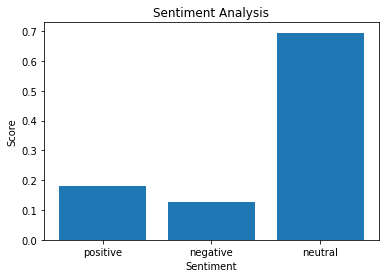

In [38]:
# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Analyze the sentiment of the text
sentiment = sia.polarity_scores(cleaned_essay)
polarity_score = sentiment['pos'] - sentiment['neg']
# Print the results
print("Sentiment analysis results:")
print("Positive: ", sentiment['pos'])
print("Negative: ", sentiment['neg'])
print("Neutral: ", sentiment['neu'])
print("Compound: ", sentiment['compound'])
print("Polarity Score", polarity_score)

import matplotlib.pyplot as plt

# Create the bar chart
plt.bar(['positive', 'negative', 'neutral'], [sentiment['pos'], sentiment['neg'], sentiment['neu']])

# Add labels and a title
plt.xlabel('Sentiment')
plt.ylabel('Score')
plt.title('Sentiment Analysis')

# Show the plot
plt.show()


* Approach 2. Sentiment Analyzer Using Text Blob

In [12]:
# import the TextBlob class
from textblob import TextBlob

# create an instance of the TextBlob
blob = TextBlob(cleaned_essay)

# use the TextBlob to calculate the sentiment
sentiment = blob.sentiment

# print the scores
print("Positive score:", sentiment.polarity)
print("Negative score:", 1 - sentiment.polarity)
print("Polarity score:", sentiment.polarity)
print("Subjectivity score:", sentiment.subjectivity)


Positive score: 0.07380471380471383
Negative score: 0.9261952861952861
Polarity score: 0.07380471380471383
Subjectivity score: 0.3605387205387205


Number of words, sentences, complex words, average sentence lenght, and gunning foc index. 

In [32]:
# Calculate the number of words in the text
num_words = len(cleaned_essay.split())

# Calculate the number of sentences in the text
num_sentences = len(cleaned_essay.split('.'))

# Calculate the number of complex words in the text
num_complex_words = len([word for word in word.split() if len(word) >= 3 and any(char.isupper() for char in word)])

AverageSentence=num_words/num_sentences
print("Average Sentence Length is ; ", AverageSentence)

GunningFoxIndex = 0.4 * (num_words / num_sentences + 100 * num_complex_words / num_words)
print("Gunning Fox Index: ", GunningFoxIndex)

Calculating Gunning Fox using syllables

In [31]:
# Import necessary modules
import re

# Function to calculate the Gunning Fox Index
def gunning_fox(essay):
  # Split the essay into sentences
  sentences = re.split(r'[.!?]', essay)

  # Calculate the number of words in the essay
  num_words = len(essay.split())

  # Calculate the number of complex words (words with 3 or more syllables)
  num_complex_words = 0
  for word in essay.split():
    if syllable_count(word) >= 3:
      num_complex_words += 1

  # Calculate the number of sentences in the essay
  num_sentences = len(sentences)

  # Calculate the Gunning Fox Index
  gfi = 0.4 * (num_words / num_sentences + 100 * num_complex_words / num_words)

  return gfi

# Function to count the number of syllables in a word
def syllable_count(word):
  # Remove any punctuation from the word
  word = re.sub(r'[^\w\s]', '', word)

  # Count the number of syllables in the word
  num_syllables = 0
  for vowel in ['a', 'e', 'i', 'o', 'u']:
    num_syllables += word.count(vowel)
  if word.endswith('e'):
    num_syllables -= 1
  if word.endswith('le'):
    num_syllables += 1
  if num_syllables == 0:
    num_syllables += 1

  return num_syllables

# calculate Gunning Fox Index for text
gfi = gunning_fox(cleaned_essay)
print(f'Gunning Fox Index: {gfi:.2f}')


Gunning Fox Index: 24.84


Counting Personal Pronouns

In [36]:
import re

def count_pronouns(cleaned_essay):
    pronouns = ['i', 'me', 'my', 'mine', 'we', 'us', 'our', 'ours']
    pronoun_count = 0
    syllable_count = 0

    # split the text into a list of words
    words = cleaned_essay.split()

    # iterate through the list of words
    for word in words:
        # if the word is a pronoun, increment the count
        if word.lower() in pronouns:
            pronoun_count += 1
        
        # count the syllables in the word
        syllable_count += count_syllables(word)

    return pronoun_count, syllable_count

def count_syllables(cleaned_essay):
    # use a regular expression to match the vowels in the word
    vowels = re.findall(r'[aeiouy]', word.lower())
    return len(vowels)


# Count the pronouns and syllables in the text
pronoun_count, syllable_count = count_pronouns(cleaned_essay)

print(f'There are {pronoun_count} pronouns and {syllable_count} syllables in the text.')

There are 0 pronouns and 1842 syllables in the text.


WordCloud

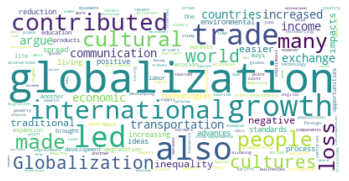

In [37]:
# Tokenize the text into a list of words
words = nltk.word_tokenize(cleaned_essay)

# Remove punctuation from the list of words
words = [word.translate(str.maketrans('', '', string.punctuation)) for word in words]

# Remove stopwords from the list of words
stopwords = nltk.corpus.stopwords.words('english')
words = [word for word in words if word.lower() not in stopwords]

# Create a dictionary of the remaining words, with the frequency of each word
word_freq = {}
for word in words:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

# Create a word cloud using the dictionary of words
wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
